<a href="https://colab.research.google.com/github/shijjabzahra/AI/blob/main/AIproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/corn-or-maize-leaf-disease-dataset


In [14]:
import os

base_dir = "/root/.cache/kagglehub/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/versions/1"

# Find the folder that contains class directories
for root, dirs, files in os.walk(base_dir):
    if set(['Blight', 'Common_Rust', 'Healthy']).issubset(set(dirs)):
        base_path = root
        break

print("Found dataset folder:", base_path)

Found dataset folder: /kaggle/input/corn-or-maize-leaf-disease-dataset/data


Naive Bayes Accuracy: 0.7788018433179723

Confusion Matrix:
 [[302  55  17]
 [ 71 285   7]
 [ 42  48 258]]

Classification Report:
               precision    recall  f1-score   support

      Blight       0.73      0.81      0.77       374
 Common_Rust       0.73      0.79      0.76       363
     Healthy       0.91      0.74      0.82       348

    accuracy                           0.78      1085
   macro avg       0.79      0.78      0.78      1085
weighted avg       0.79      0.78      0.78      1085



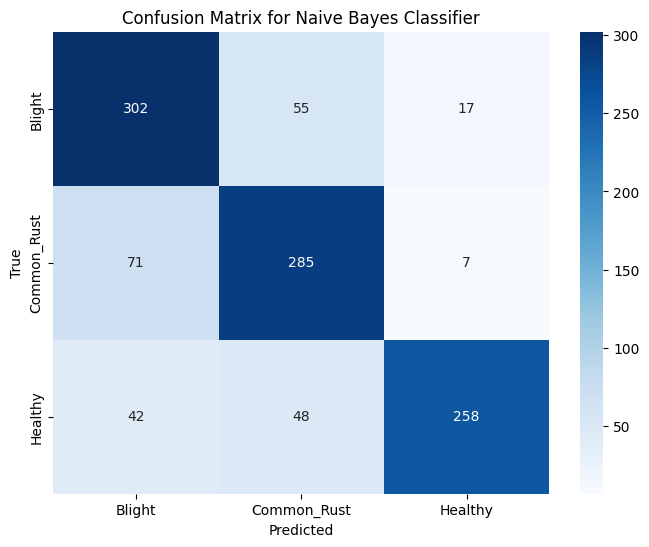

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Path to dataset folders
# data_dir = "/root/.cache/kagglehub/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/versions/1/data"
data_dir = base_path # Use the path found in the previous cell

categories = ['Blight', 'Common_Rust', 'Healthy']

# Feature extraction
def extract_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    return image.mean(axis=(0, 1))  # Mean R, G, B

# Load data
features = []
labels = []

for label in categories:
    folder_path = os.path.join(data_dir, label)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        try:
            features.append(extract_features(img_path))
            labels.append(label)
        except:
            continue

# Create DataFrame
df = pd.DataFrame(features, columns=['mean_red', 'mean_green', 'mean_blue'])
df['label'] = labels

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

X = df[['mean_red', 'mean_green', 'mean_blue']]
y = df['label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()